**DATA PREPROCESSING**

In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


In [30]:
# Load the bank marketing dataset
bank_data = pd.read_csv("C:/Users/ohene/OneDrive/Documents/new_repo/Mini Project 3/bank-additional/bank-additional/bank-additional-full.csv", delimiter=';')  

# Load the customer demographic dataset
demographics_data = pd.read_csv("C:/Users/ohene/OneDrive/Documents/new_repo/Mini Project 3/archive (7)/marketing_campaign.csv")

# Explore both datasets
print(bank_data.head())
print(demographics_data.head())

#  Remove quotes from column names
bank_data.columns = [col.replace('"', '') for col in bank_data.columns]

# Check the cleaned column names
print(bank_data.columns)

# Rename columns in demographics_data to match bank_data 
demographics_data.rename(columns={
    'Education': 'education', 
    'Marital_Status': 'marital',
    'ID': 'customer_id'  # Rename ID column to 'customer_id'
}, inplace=True)

# Explore the cleaned demographics_data
print(demographics_data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [31]:
# Load the customer demographic dataset with the correct delimiter 
demographics_data = pd.read_csv("C:/Users/ohene/OneDrive/Documents/new_repo/Mini Project 3/archive (7)/marketing_campaign.csv", delimiter='\t')

# Check if the data is now correctly split into columns
print(demographics_data.head())



     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [32]:
print(bank_data.columns)  # Inspect columns in bank_data
print(demographics_data.columns)  # Inspect columns in demographics_data


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [33]:
# Convert 'Year_Birth' to 'age' in demographics_data
demographics_data['age'] = 2024 - demographics_data['Year_Birth']


In [34]:
# Rename columns in demographics_data to align with bank_data
demographics_data.rename(columns={'Education': 'education', 'Marital_Status': 'marital'}, inplace=True)

In [35]:
print(demographics_data.info())
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital              2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
# Check unique values in the 'education' and 'marital' columns in both datasets
print("Unique 'education' values in bank_data:")
print(bank_data['education'].unique())

print("\nUnique 'education' values in demographics_data:")
print(demographics_data['education'].unique())

print("\nUnique 'marital' values in bank_data:")
print(bank_data['marital'].unique())

print("\nUnique 'marital' values in demographics_data:")
print(demographics_data['marital'].unique())


Unique 'education' values in bank_data:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique 'education' values in demographics_data:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Unique 'marital' values in bank_data:
['married' 'single' 'divorced' 'unknown']

Unique 'marital' values in demographics_data:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [37]:
# Create a mapping for education values in demographics_data to align with bank_data
education_mapping = {
    'Basic': 'basic',
    '2n Cycle': 'high.school',
    'Graduation': 'university.degree',
    'Master': 'university.degree',
    'PhD': 'university.degree'
}

# Apply the mapping to demographics_data
demographics_data['education'] = demographics_data['education'].replace(education_mapping)


In [38]:
# Create a mapping for marital status in demographics_data to align with bank_data
marital_mapping = {
    'Single': 'single',
    'Together': 'married',
    'Married': 'married',
    'Divorced': 'divorced',
    'Widow': 'divorced',  
    'Alone': 'unknown',
    'Absurd': 'unknown',
    'YOLO': 'unknown'
}

# Apply the mapping to demographics_data
demographics_data['marital'] = demographics_data['marital'].replace(marital_mapping)


In [41]:
# Perform the merge after standardizing the values
df = pd.merge(bank_data, demographics_data, 
                       left_on=['age', 'education', 'marital'], 
                       right_on=['age', 'education', 'marital'], 
                       how='inner')

# Check the merged data
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,5,0,0,0,0,0,0,3,11,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7,0,0,0,0,0,0,3,11,0
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,8,0,0,0,0,0,0,3,11,0
3,57,retired,married,high.school,no,no,no,telephone,may,mon,...,5,0,0,0,0,0,0,3,11,0
4,57,retired,married,high.school,no,no,no,telephone,may,mon,...,7,0,0,0,0,0,0,3,11,0


In [12]:
# Check for missing values
print(df.isnull().sum())


age                       0
job                       0
marital                   0
education                 0
default                   0
housing                   0
loan                      0
contact                   0
month                     0
day_of_week               0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome                  0
emp.var.rate              0
cons.price.idx            0
cons.conf.idx             0
euribor3m                 0
nr.employed               0
y                         0
ID                        0
Year_Birth                0
Income                 1729
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases     

In [13]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,...,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000,178922.0,178922.0,178922.000000
mean,45.819899,255.086893,2.630174,955.065107,0.186075,0.090192,93.521966,-39.784025,3.681161,5169.087406,...,5.433614,0.081287,0.064883,0.089167,0.068035,0.012933,0.008216,3.0,11.0,0.144510
std,8.244379,251.587861,2.930894,204.285809,0.528538,1.582030,0.561764,4.617016,1.705835,74.039459,...,2.451864,0.273276,0.246320,0.284986,0.251807,0.112986,0.090269,0.0,0.0,0.351607
min,28.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,39.000000,100.000000,1.000000,999.000000,0.000000,-1.800000,93.200000,-42.700000,1.405000,5099.100000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,46.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5195.800000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,52.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.100000,4.962000,5228.100000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,83.000000,3422.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
# Calculate the median of the 'Income' column
median_income = df['Income'].median()

# Fill missing values with the median
df['Income'].fillna(median_income, inplace=True)

# Verify that the missing values have been handled
print(df['Income'].isnull().sum())  # Should output 0


0


**EXPLORATORY DATA ANALYSIS**

<Axes: >

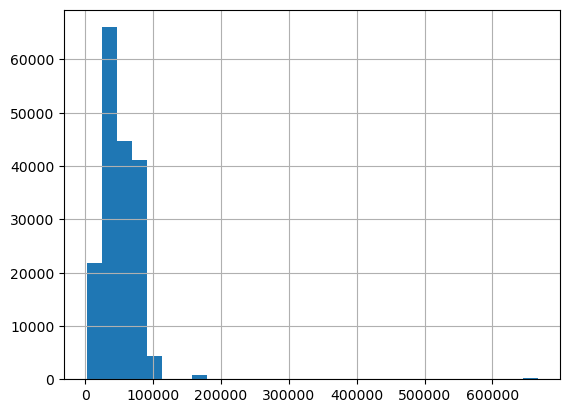

In [15]:
df['Income'].hist(bins=30)


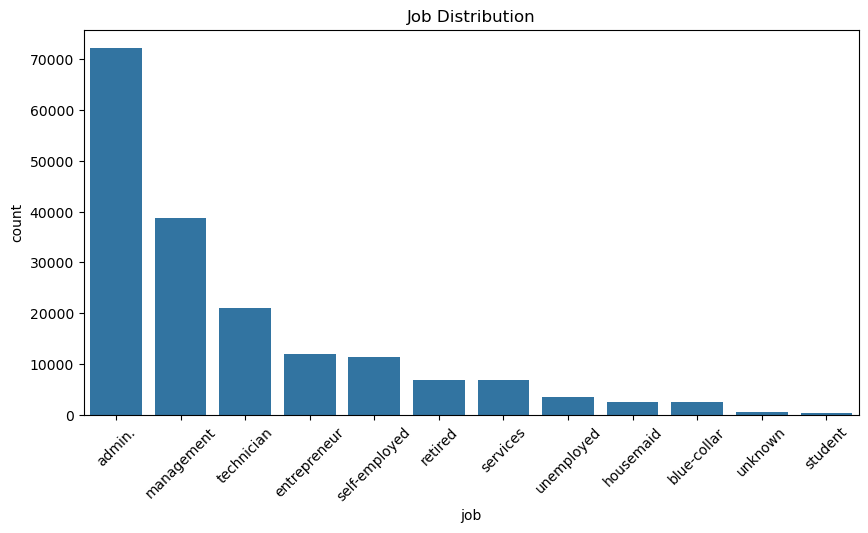

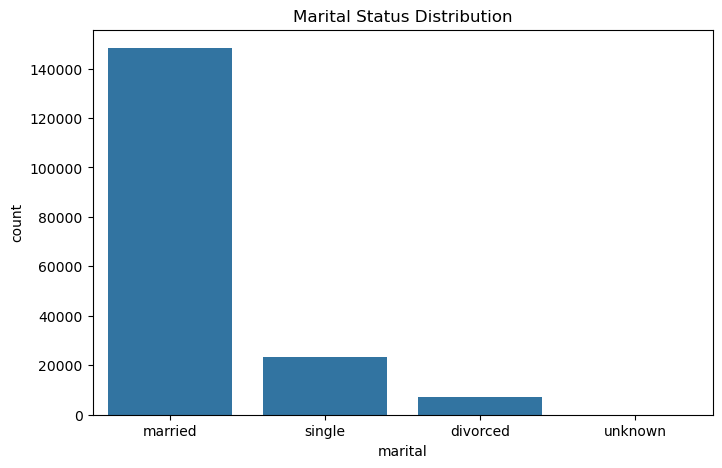

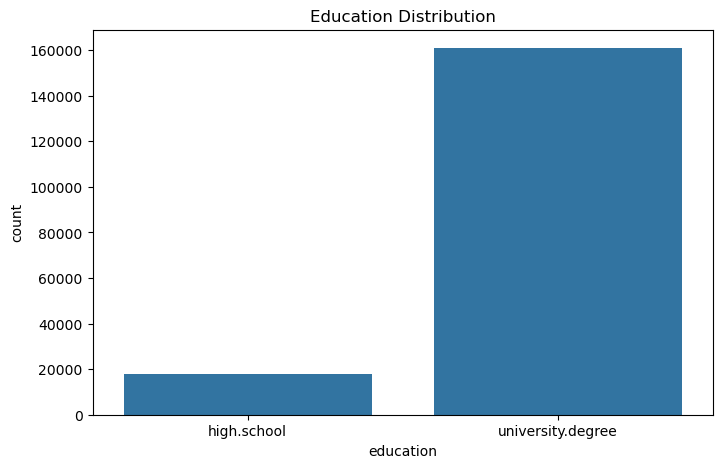

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count plots for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df)
plt.title('Education Distribution')
plt.show()


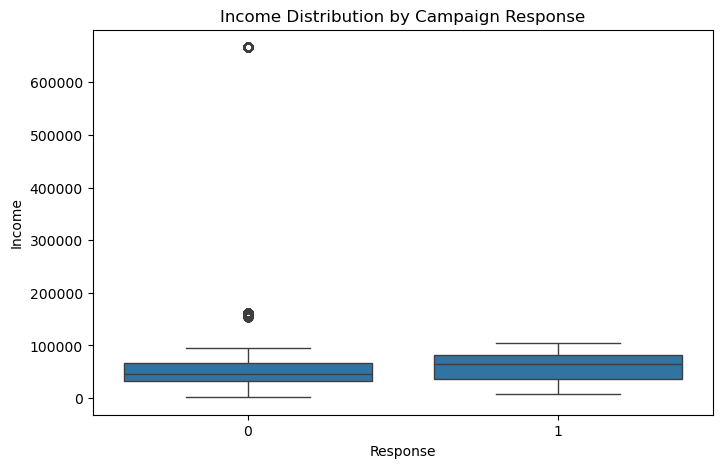

In [18]:
# Income Distribution by Campaign Response
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income Distribution by Campaign Response')
plt.show()


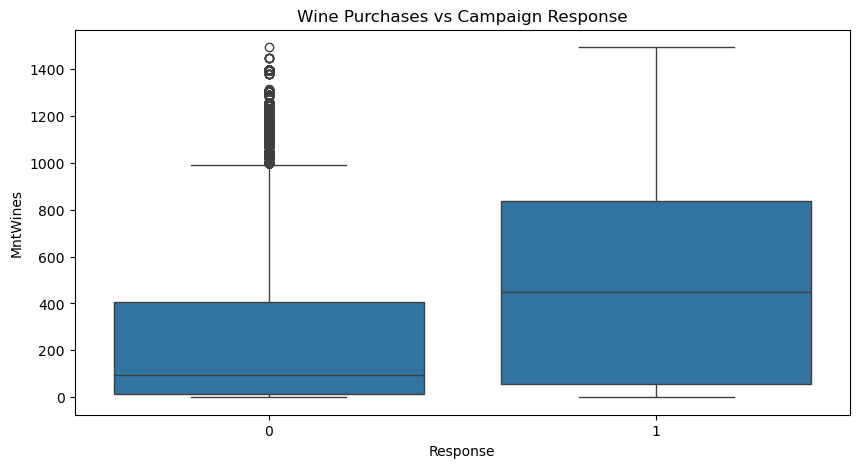

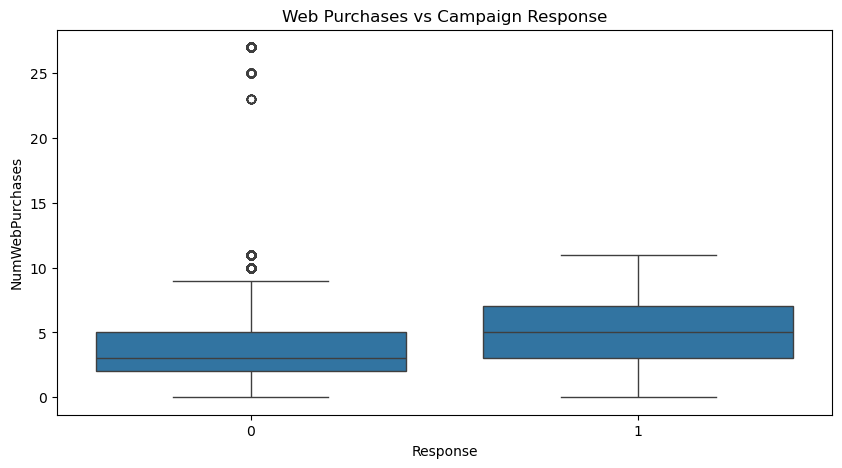

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Response', y='MntWines', data=df)
plt.title('Wine Purchases vs Campaign Response')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Response', y='NumWebPurchases', data=df)
plt.title('Web Purchases vs Campaign Response')
plt.show()


<Axes: >

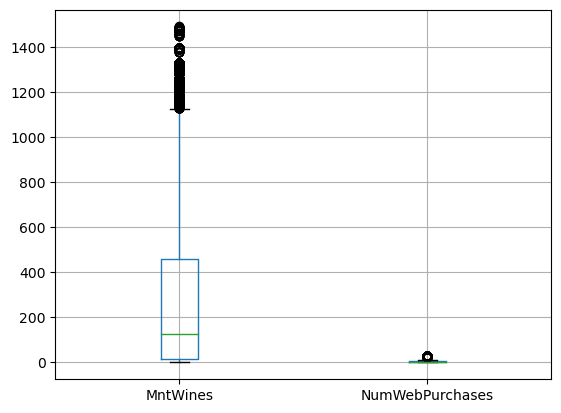

In [20]:
df.boxplot(column=['MntWines', 'NumWebPurchases'])


**UNSUPERVISED LEARNING**

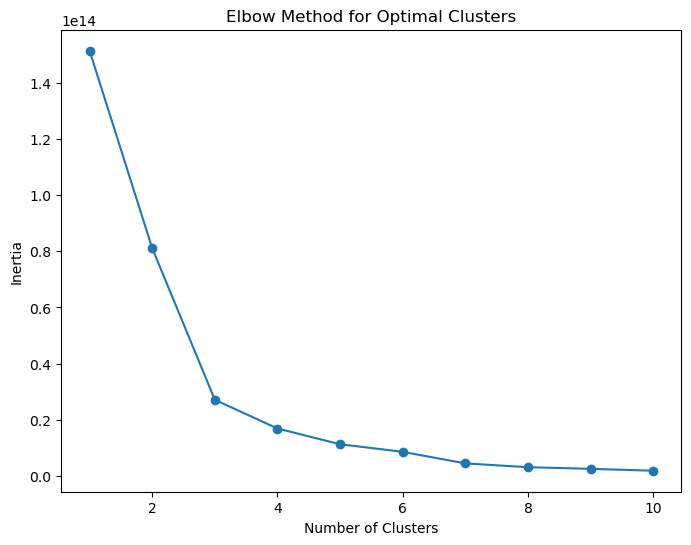

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store inertia values
inertia = []

# Test different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['age', 'Income', 'MntWines', 'NumWebPurchases']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


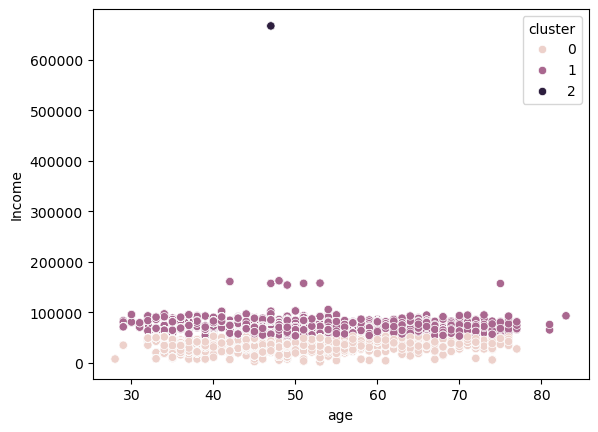

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['age', 'Income', 'MntWines', 'NumWebPurchases']])

# Visualize cluster distribution
sns.scatterplot(x='age', y='Income', hue='cluster', data=df)
plt.show()


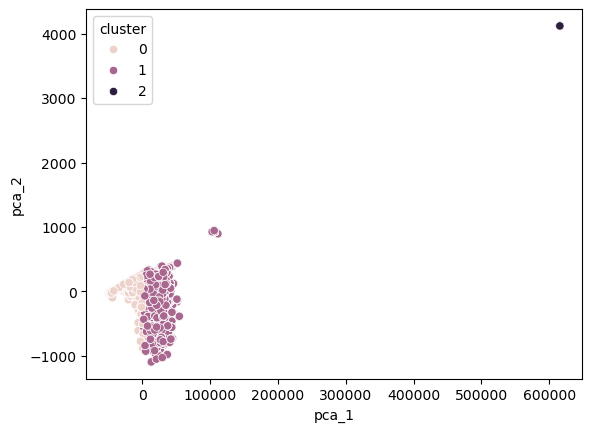

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['age', 'Income', 'MntWines', 'NumWebPurchases']])

df['pca_1'] = pca_components[:, 0]
df['pca_2'] = pca_components[:, 1]

# Visualize PCA components
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df)
plt.show()


**Feature Engineering and Supervised Learning**

In [24]:
# Use clusters and PCA components as features
X = df[['age', 'Income', 'MntWines', 'NumWebPurchases', 'cluster', 'pca_1', 'pca_2']]
y = df['Response']


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Store results for later visualization
    model_results[name] = {"accuracy": acc, "roc_auc": roc_auc, "y_prob": y_prob, "y_pred": y_pred}


C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8642
ROC AUC: 0.6823
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     45963
           1       0.76      0.08      0.15      7714

    accuracy                           0.86     53677
   macro avg       0.81      0.54      0.54     53677
weighted avg       0.85      0.86      0.81     53677

Model: Random Forest
Accuracy: 0.9910
ROC AUC: 0.9997
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     45963
           1       0.99      0.95      0.97      7714

    accuracy                           0.99     53677
   macro avg       0.99      0.97      0.98     53677
weighted avg       0.99      0.99      0.99     53677

Model: Gradient Boosting
Accuracy: 0.9197
ROC AUC: 0.9316
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     45963
           1       0.99      0.45      0.61      7714

    accura

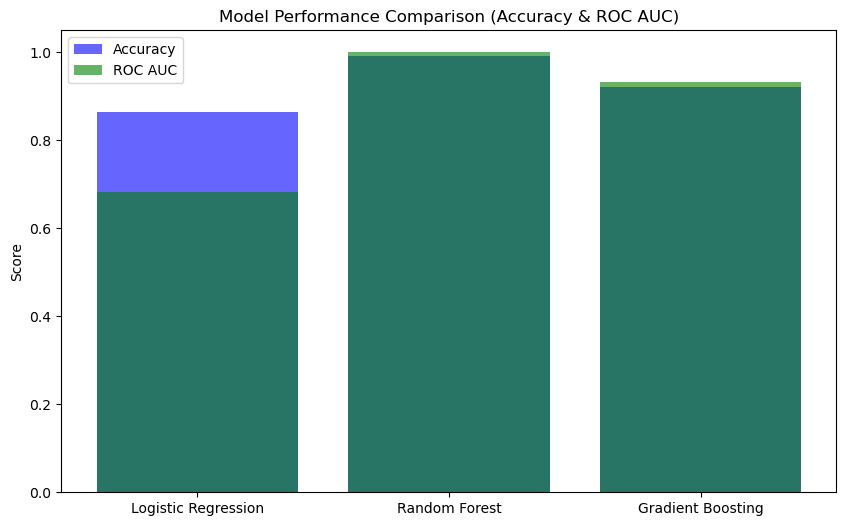

In [27]:
import matplotlib.pyplot as plt

# Extract accuracies and ROC AUCs
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]
roc_aucs = [model_results[name]['roc_auc'] for name in model_names]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue', alpha=0.6, label='Accuracy')
plt.bar(model_names, roc_aucs, color='green', alpha=0.6, label='ROC AUC')
plt.title('Model Performance Comparison (Accuracy & ROC AUC)')
plt.ylabel('Score')
plt.legend()
plt.show()


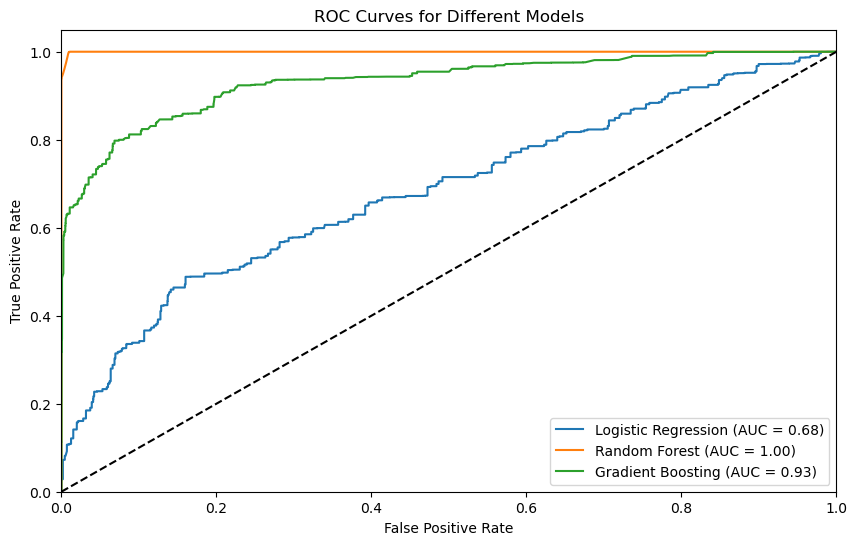

In [28]:
plt.figure(figsize=(10, 6))

for name, result in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
